In [1]:
import seaborn as sns
%matplotlib inline
import pandas as pd

df=pd.read_csv ('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')
df.tail(100)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101666,442576412,186544184,Asian,Female,[30-40),?,2,1,1,4,...,No,Steady,No,No,No,No,No,No,Yes,NO
101667,442577684,78208677,Caucasian,Male,[70-80),[75-100),1,3,7,4,...,No,No,No,No,No,No,No,Ch,Yes,<30
101668,442582202,157554707,Caucasian,Male,[50-60),?,1,1,7,2,...,No,Steady,No,No,No,No,No,No,Yes,NO
101669,442588730,43281387,Caucasian,Male,[40-50),?,1,1,7,2,...,No,No,No,No,No,No,No,No,No,NO
101670,442591346,108773406,Caucasian,Male,[50-60),?,2,1,7,4,...,No,Up,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [2]:
#clean up the invalid in gender column(this was found after pulling stats)
missing_values = ['Unknown/Invalid']
df2=pd.read_csv ('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv', na_values = missing_values)

In [3]:
#checking the data type
df3 = df2[['age', 'gender', 'time_in_hospital', 'diabetesMed']]
df3.dtypes

age                 object
gender              object
time_in_hospital     int64
diabetesMed         object
dtype: object

In [4]:
#cleaning the age column to remove ( & ])
df3["age"] = df3["age"].str.replace("[", " ")
df3["age"] = df3["age"].str.replace(")", " ")
df3.head(5)

<ipython-input-4-d5a8283d989a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["age"] = df3["age"].str.replace("[", " ")
<ipython-input-4-d5a8283d989a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["age"] = df3["age"].str.replace(")", " ")


,age,gender,time_in_hospital,diabetesMed
0,0-10,Female,1,No
1,10-20,Female,3,Yes
2,20-30,Female,2,Yes
3,30-40,Male,2,Yes
4,40-50,Male,1,Yes


In [5]:
#changing age data type from objec to integer
df3['age'].dtype
df3['age'] = df3['age'].astype(str)
df3['age'] = df3['age'].str.extract('(\d+)').astype(int)
df3.dtypes

<ipython-input-5-9211b72b0c1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['age'] = df3['age'].astype(str)
<ipython-input-5-9211b72b0c1f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['age'] = df3['age'].str.extract('(\d+)').astype(int)


age                  int64
gender              object
time_in_hospital     int64
diabetesMed         object
dtype: object

In [6]:
#double checking for Na in rows
nan_rows = df3.isna().any(axis=1)
print(nan_rows)

0         False
1         False
2         False
3         False
4         False
          ...  
101761    False
101762    False
101763    False
101764    False
101765    False
Length: 101766, dtype: bool


In [7]:
#getting the column names
df3.columns

Index(['age', 'gender', 'time_in_hospital', 'diabetesMed'], dtype='object')

In [8]:
#filtering out only Female from D3
df3[df3['gender']== 'Female']

,age,gender,time_in_hospital,diabetesMed
0,0,Female,1,No
1,10,Female,3,Yes
2,20,Female,2,Yes
8,80,Female,13,Yes
9,90,Female,12,Yes
...,...,...,...,...
101757,70,Female,5,Yes
101758,80,Female,5,Yes
101760,60,Female,6,Yes
101762,80,Female,5,Yes


In [9]:
#Stats: showing the mean of time spent in hospital for Female who took med and those who didn't , per age group

grouped_multiple = df3.groupby(['age', 'diabetesMed']).agg({'time_in_hospital': ['mean']})
grouped_multiple.columns = ['Mean']
grouped_multiple = grouped_multiple.reset_index()
print(grouped_multiple)

    age diabetesMed      Mean
0     0          No  2.035714
1     0         Yes  2.654135
2    10          No  3.186813
3    10         Yes  3.191667
4    20          No  3.307018
5    20         Yes  3.631939
6    30          No  3.381210
7    30         Yes  3.935767
8    40          No  3.723246
9    40         Yes  4.137070
10   50          No  3.768353
11   50         Yes  4.228565
12   60          No  4.021962
13   60         Yes  4.481915
14   70          No  4.222222
15   70         Yes  4.698182
16   80          No  4.470932
17   80         Yes  4.920629
18   90          No  4.362780
19   90         Yes  4.927469


In [10]:
#double checking the column name to graph
grouped_multiple.columns

Index(['age', 'diabetesMed', 'Mean'], dtype='object')

<ipython-input-11-18bd768bf12e>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_multiple, x='age', y='Mean',


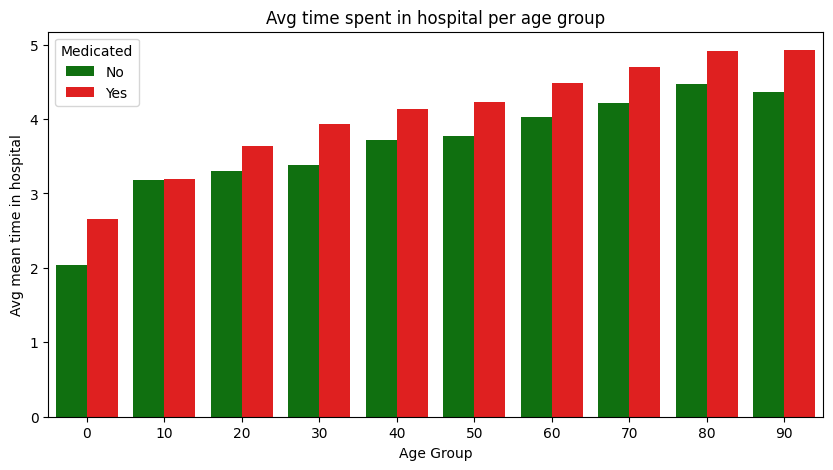

In [11]:
#graphing
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(data=grouped_multiple, x='age', y='Mean',
                 hue='diabetesMed', ci=None, palette=["green", "red"])

plt.title('Avg time spent in hospital per age group')
plt.xlabel('Age Group')
plt.ylabel('Avg mean time in hospital')
plt.legend(title='Medicated')

def specs(x, **kwargs):
    plt.axhline(x.mean(), c='k', ls='-', lw=2.5)

plt.show()

#observation

For all female in all age group, it shows that female who took medication are likely to spent an average more time in the hospital than those who did not take any medication. Medicated Female shows an increase average time spent in hospital than those that did not take any medication. The highest that spent avg more time in hospital is the 90 age group.